In [1]:
import pandas as pd

In [2]:
import numpy as np


In [3]:
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('C:\\Users\\aa\\Downloads\\titanic.csv')

In [124]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.Cabin.loc[~df.Cabin.isnull()] = 1  
df.Cabin.loc[df.Cabin.isnull()] = 0 

C:\Users\aa\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,1,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,0,C


In [127]:
df.Age.fillna(0,inplace=True)

In [128]:
df.Embarked.fillna(0,inplace=True)

In [49]:
df.Cabin.fillna(0,inplace=True)

In [107]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,0,0,0,0.0,0,0,0,0.0,0,0
1,1,1,1,1,1,1.0,1,1,1,1.0,1,1


In [7]:
y = df['Survived']

In [8]:
x = df[['PassengerId','Pclass','Cabin','Fare']]

C:\Users\aa\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [9]:
import statsmodels.api as sm

In [10]:
model_Simple = sm.OLS(y,x).fit()

In [11]:
print(model_Simple.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 12 Jul 2019   Prob (F-statistic):          5.18e-108
Time:                        15:18:10   Log-Likelihood:                -584.26
No. Observations:                 891   AIC:                             1177.
Df Residuals:                     887   BIC:                             1196.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
PassengerId     0.0001   5.72e-05      1.995      

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rfc=RandomForestClassifier()

In [16]:
rfc.fit(X_train, y_train)

C:\Users\aa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
pred=rfc.predict(X_test)

In [18]:
pd.DataFrame(pred).head(2)

,0
0,0
1,1


In [20]:
from sklearn.metrics import confusion_matrix

In [22]:
shivam3 = confusion_matrix(y_test, pred)

In [23]:
pd.DataFrame(shivam3)

,0,1
0,111,28
1,36,48


In [145]:
from sklearn.linear_model import LogisticRegression

In [146]:
shivam = LogisticRegression(random_state=0)

In [147]:
shivam.fit(X_train, y_train)

C:\Users\aa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [148]:
y_pred = shivam.predict(X_test)

In [149]:
y_pred

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0], dtype=int64)

In [150]:
shivam_pred=pd.DataFrame(y_pred)

In [151]:
shivam_pred

,0
0,0
1,0
2,0
3,1
4,0
5,1
6,1
7,1
8,1
9,0


In [152]:
from sklearn.metrics import confusion_matrix

In [153]:
shivam2 = confusion_matrix(y_test, y_pred)

In [154]:
pd.DataFrame(shivam2)

,0,1
0,126,13
1,48,36


In [156]:
import matplotlib.pyplot as plt

In [158]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = shivam.predict(X_test)
xxx= pd.DataFrame(probs)
preds = xxx
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

Text(0.5, 0, 'False Positive Rate')

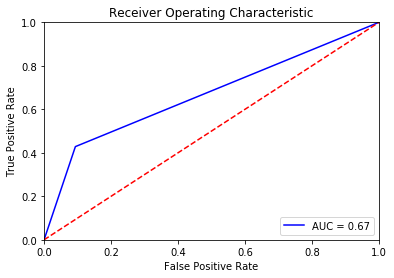

In [159]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833


ValueError: shapes (891,6) and (891,6) not aligned: 6 (dim 1) != 891 (dim 0)

TypeError: '(slice(None, None, None), 11)' is an invalid key